<h1>UK ROAD ACCIDENT DATA ANALYSIS</h1>
<h1>INCLUSIVE YEAR 2019 - 2022</h1>

In [1]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium geopandas


Note: you may need to restart the kernel to use updated packages.


<h3>Analyst : Ramon Bernal</h3>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import folium
from folium.plugins import HeatMap
from mpl_toolkits.mplot3d import Axes3D

In [4]:
accidents = pd.read_csv('datasets\\accident_data.csv')

In [5]:
accidents

Index Accident_Severity Accident Date   Latitude  \
0       200701BS64157           Serious      5/6/2019  51.506187   
1       200701BS65737           Serious      2/7/2019  51.495029   
2       200701BS66127           Serious    26-08-2019  51.517715   
3       200701BS66128           Serious    16-08-2019  51.495478   
4       200701BS66837            Slight      3/9/2019  51.488576   
...               ...               ...           ...        ...   
660674  201091NM01760            Slight    18-02-2022  57.374005   
660675  201091NM01881            Slight    21-02-2022  57.232273   
660676  201091NM01935            Slight    23-02-2022  57.585044   
660677  201091NM01964           Serious    23-02-2022  57.214898   
660678  201091NM02142           Serious    28-02-2022  57.575210   

                   Light_Conditions           District Area  Longitude  \
0             Darkness - lights lit  Kensington and Chelsea  -0.209082   
1                          Daylight  Kensington and Chelsea  -0.173647   
2       Darkness - lighting unknown  Kensington and Chelsea  -0.210215   
3                          Daylight  Kensington and Chelsea  -0.202731   
4             Darkness - lights lit  Kensington and Chelsea  -0.192487   
...                             ...                     ...        ...   
660674                     Daylight                Highland  -3.467828   
660675       Darkness - no lighting                Highland  -3.809281   
660676                     Daylight                Highland  -3.862727   
660677       Darkness - no lighting                Highland  -3.823997   
660678                     Daylight                Highland  -3.895673   

        Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                          1                   2                     Dry   
1                          1                   2             Wet or damp   
2                          1                   3                     Dry   
3                          1                   4                     Dry   
4                          1                   2                     Dry   
...                      ...                 ...                     ...   
660674                     2                   1                     Dry   
660675                     1                   1            Frost or ice   
660676                     1                   3            Frost or ice   
660677                     1                   2             Wet or damp   
660678                     1                   1             Wet or damp   

                 Road_Type Urban_or_Rural_Area     Weather_Conditions  \
0       Single carriageway               Urban     Fine no high winds   
1       Single carriageway               Urban  Raining no high winds   
2                      NaN               Urban                    NaN   
3       Single carriageway               Urban     Fine no high winds   
4                      NaN               Urban                    NaN   
...                    ...                 ...                    ...   
660674  Single carriageway               Rural     Fine no high winds   
660675  Single carriageway               Rural     Fine no high winds   
660676  Single carriageway               Rural     Fine no high winds   
660677  Single carriageway               Rural     Fine no high winds   
660678    Dual carriageway               Rural  Snowing no high winds   

                                Vehicle_Type  
0                                        Car  
1                                        Car  
2                      Taxi/Private hire car  
3       Bus or coach (17 or more pass seats)  
4                              Other vehicle  
...                                      ...  
660674                                   Car  
660675                                   Car  
660676                                   Car  
660677                 Motorcycle over 500cc  
660

In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [7]:
accidents.isnull()

Index  Accident_Severity  Accident Date  Latitude  Light_Conditions  \
0       False              False          False     False             False   
1       False              False          False     False             False   
2       False              False          False     False             False   
3       False              False          False     False             False   
4       False              False          False     False             False   
...       ...                ...            ...       ...               ...   
660674  False              False          False     False             False   
660675  False              False          False     False             False   
660676  False              False          False     False             False   
660677  False              False          False     False             False   
660678  False              False          False     False             False   

        District Area  Longitude  Number_of_Casualties  Number_of_Vehicles  \
0               False      False                 False               False   
1               False      False                 False               False   
2               False      False                 False               False   
3               False      False                 False               False   
4               False      False                 False               False   
...               ...        ...                   ...                 ...   
660674          False      False                 False               False   
660675          False      False                 False               False   
660676          False      False                 False               False   
660677          False      False                 False               False   
660678          False      False                 False               False   

        Road_Surface_Conditions  Road_Type  Urban_or_Rural_Area  \
0                         False      False                False   
1                         False      False                False   
2                         False       True                False   
3                         False      False                False   
4                         False       True                False   
...                         ...        ...                  ...   
660674                    False      False                False   
660675                    False      False                False   
660676                    False      False                False   
660677                    False      False                False   
660678                    False      False                False   

        Weather_Conditions  Vehicle_Type  
0                    False         False  
1                    False         False  
2                     True         False  
3                    False         False  
4                     True         False  
...                    ...           ...  
660674               False         False  
660675               False         False  
660676               False         False  
660677               False         False  
660678               False         False  

[660679 rows x 14 columns]

In [8]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [9]:
accidents.describe()

Latitude      Longitude  Number_of_Casualties  Number_of_Vehicles
count  660654.000000  660653.000000         660679.000000       660679.000000
mean       52.553866      -1.431210              1.357040            1.831255
std         1.406922       1.383330              0.824847            0.715269
min        49.914430      -7.516225              1.000000            1.000000
25%        51.490690      -2.332291              1.000000            1.000000
50%        52.315641      -1.411667              1.000000            2.000000
75%        53.453452      -0.232869              1.000000            2.000000
max        60.757544       1.762010             68.000000           32.000000

options

- delete the row

- fill the empty cells with a value

In [10]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mean())

In [11]:
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mean())

In [12]:
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])

In [13]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [14]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [15]:
accidents.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [16]:
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')

In [17]:
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')

In [18]:
accidents['District Area'] = accidents['District Area'].astype('category')

In [19]:
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')

In [20]:
accidents['Road_Type'] = accidents['Road_Type'].astype('category')

In [21]:
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')

In [22]:
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')

In [23]:
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

In [24]:
accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>INSIGHTS</h1>

<h1>Insight No. 1</h1>
<h1>Which meteorological circumstances result in the most accidents?</h1>
<h1>Okay, no high winds cause the most accidents.</h1>


In [25]:
weatherCdt_accidents = accidents['Weather_Conditions'].value_counts()

In [26]:
weatherCdt_accidents

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h1>Scatter Plot - The Highest is the Fine no high winds</h1>

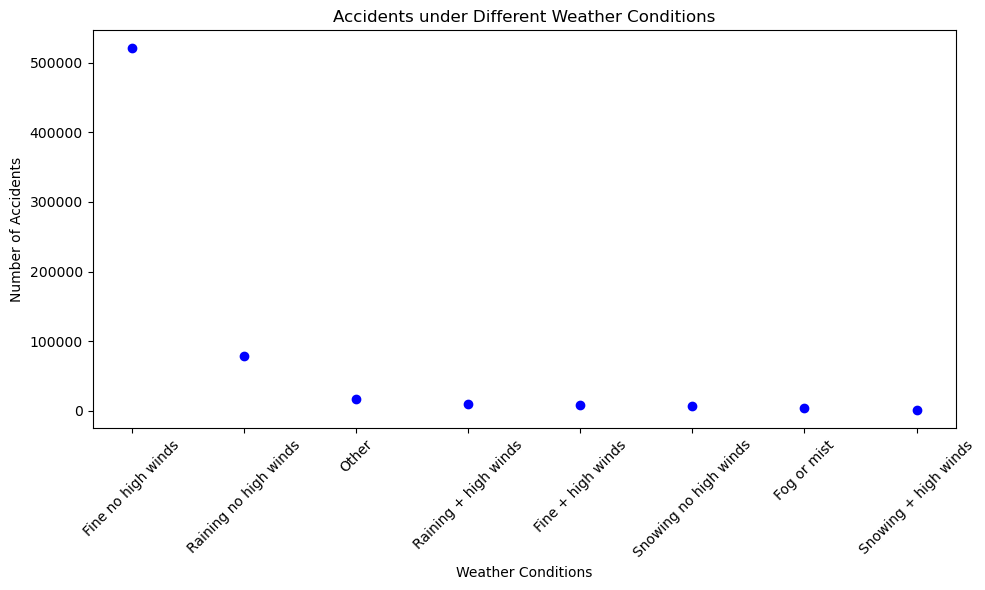

In [27]:
data = {'Weather_Conditions': ['Fine no high winds', 'Raining no high winds', 'Other', 
                               'Raining + high winds', 'Fine + high winds', 'Snowing no high winds', 
                               'Fog or mist', 'Snowing + high winds'],
        'Accidents': [520885, 79096, 17156, 9615, 8544, 6238, 3528, 885]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.scatter(df['Weather_Conditions'], df['Accidents'], color='blue')
plt.title('Accidents under Different Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>Insight No. 2</h1>
<h1>Do the number of vehicles engaged change between urban and rural areas?</h1>
<h1>Yes, the number of automobiles engaged in accidents varies amongst them.</h1>
<h1>There is a link between the number of automobiles participating and urban versus rural locations.</h1>

<h1>Bar plot - Highest is the Birmingham</h1>

In [28]:
severity_district = accidents[accidents['Accident_Severity'] == 'Fatal']['District Area'].value_counts()

In [29]:
severity_district

District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
                           ... 
Havant                        2
Orkney Islands                2
Harlow                        1
Stevenage                     1
Clackmannanshire              1
Name: count, Length: 422, dtype: int64

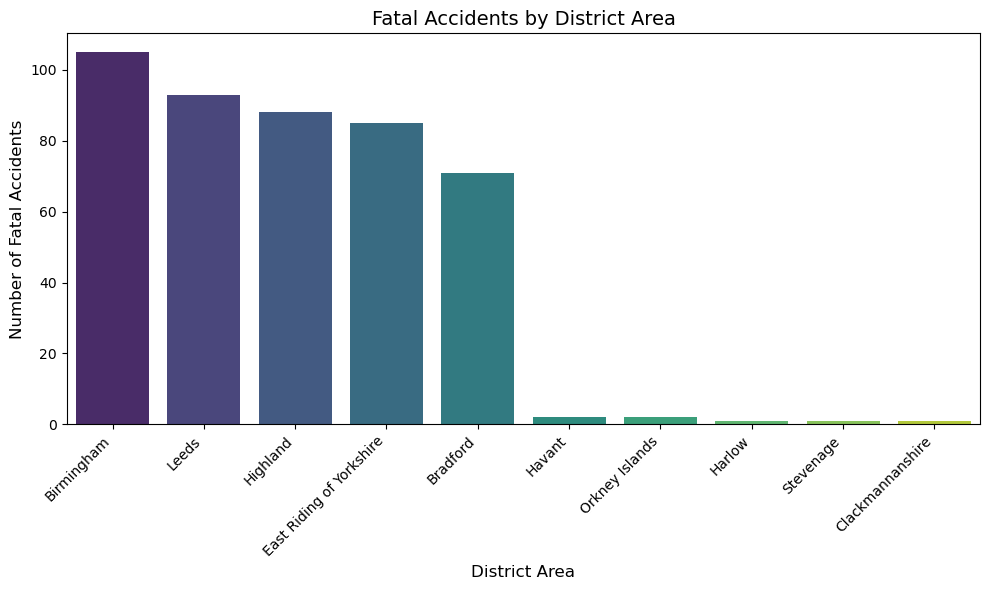

In [30]:
data = {'District Area': ['Birmingham', 'Leeds', 'Highland', 'East Riding of Yorkshire', 'Bradford', 'Havant', 'Orkney Islands', 'Harlow', 'Stevenage', 'Clackmannanshire'],
        'Fatal Accidents': [105, 93, 88, 85, 71, 2, 2, 1, 1, 1]}

df = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='District Area', y='Fatal Accidents', data=df, palette='viridis')

# Customize the plot
plt.title('Fatal Accidents by District Area', fontsize=14)
plt.xlabel('District Area', fontsize=12)
plt.ylabel('Number of Fatal Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

<h1>Insight No. 3</h1>
<h1>According to reports, Birmingham has the most fatal accidents (105), followed by Leeds (93), and Highland (88).</h1>

<h1>Relationship between accident weight and number of vehicles</h1>

In [31]:
severity_vehicles = np.round(accidents.groupby('Accident_Severity')['Number_of_Casualties'].mean(), 0)

In [32]:
severity_vehicles

Accident_Severity
Fatal      2.0
Serious    1.0
Slight     1.0
Name: Number_of_Casualties, dtype: float64

<h1>Bar Plot - The Highest is the Fatal</h1>

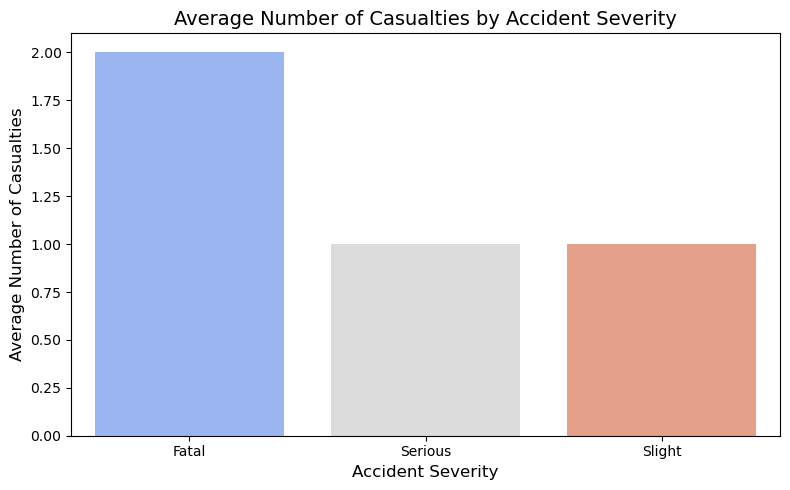

In [33]:
data = {'Accident Severity': ['Fatal', 'Serious', 'Slight'],
        'Average Number of Casualties': [2.0, 1.0, 1.0]}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
sns.barplot(x='Accident Severity', y='Average Number of Casualties', data=df, palette='coolwarm')

plt.title('Average Number of Casualties by Accident Severity', fontsize=14)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Average Number of Casualties', fontsize=12)
plt.tight_layout()

plt.show()

<h1>Insight No. 4</h1>
<h1>Which district region has the greatest average casualty rate</h1>
<h1>Blaenau Gwent has the greatest average number of casualties.</h1>

<h1>Most often, vehicle types related to fatal accidents</h1>

In [34]:
districtarea_accidents = accidents['District Area'].value_counts()

In [35]:
districtarea_accidents

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

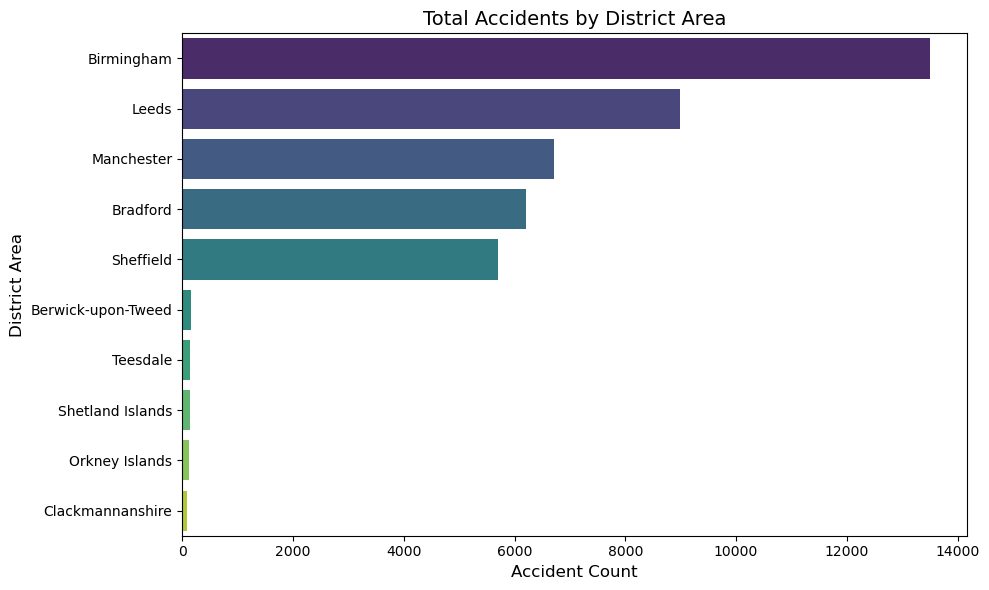

In [36]:

district_data = {'District Area': ['Birmingham', 'Leeds', 'Manchester', 'Bradford', 'Sheffield', 
                                   'Berwick-upon-Tweed', 'Teesdale', 'Shetland Islands', 'Orkney Islands', 'Clackmannanshire'],
                 'Accident Count': [13491, 8988, 6720, 6212, 5710, 153, 142, 133, 117, 91]}

df_districts = pd.DataFrame(district_data)
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='District Area', data=df_districts, palette='viridis')

plt.title('Total Accidents by District Area', fontsize=14)
plt.xlabel('Accident Count', fontsize=12)
plt.ylabel('District Area', fontsize=12)
plt.tight_layout()

plt.show()

<h1>Insight No. 5</h1>


<h1>Cars are most fatal accidents (6,577 registrations).</h1>

In [37]:
light_severity = accidents.groupby('Light_Conditions')['Accident_Severity'].value_counts()

In [38]:
light_severity

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Slight                 5622
                             Serious                 794
                             Fatal                    68
Darkness - lights lit        Slight               108345
                             Serious               19130
                             Fatal                  1860
Darkness - lights unlit      Slight                 2138
                             Serious                 360
                             Fatal                    45
Darkness - no lighting       Slight                28651
                             Serious                7174
                             Fatal                  1612
Daylight                     Slight               419045
                             Serious               60759
                             Fatal                  5076
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

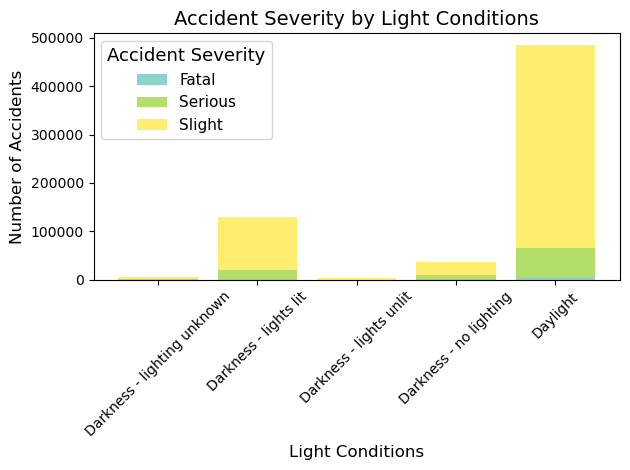

In [39]:
severity_light_conditions = accidents.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack()
plt.figure(figsize=(10, 6))
severity_light_conditions.plot(kind='bar', stacked=True, colormap='Set3', width=0.8)
plt.title('Accident Severity by Light Conditions', fontsize=14)
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accident Severity', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

<h1>Insight No. 6</h1>
<h1>The majority of accidents occur during daylight hours, with 419,045 minor, 60,759 serious, and 5,076 fatalities reported.</h1>


<h1>Relationship between road type and accident severity.</h1>

In [40]:
rtype_severity = accidents.groupby('Road_Type')['Accident_Severity'].value_counts()

In [41]:
rtype_severity

Road_Type           Accident_Severity
Dual carriageway    Slight                85863
                    Serious               11746
                    Fatal                  1815
One way street      Slight                11809
                    Serious                1655
                    Fatal                    95
Roundabout          Slight                40185
                    Serious                3665
                    Fatal                   142
Single carriageway  Slight               415557
                    Serious               70059
                    Fatal                  6527
Slip road           Slight                 6381
                    Serious                 611
                    Fatal                    49
Name: count, dtype: int64

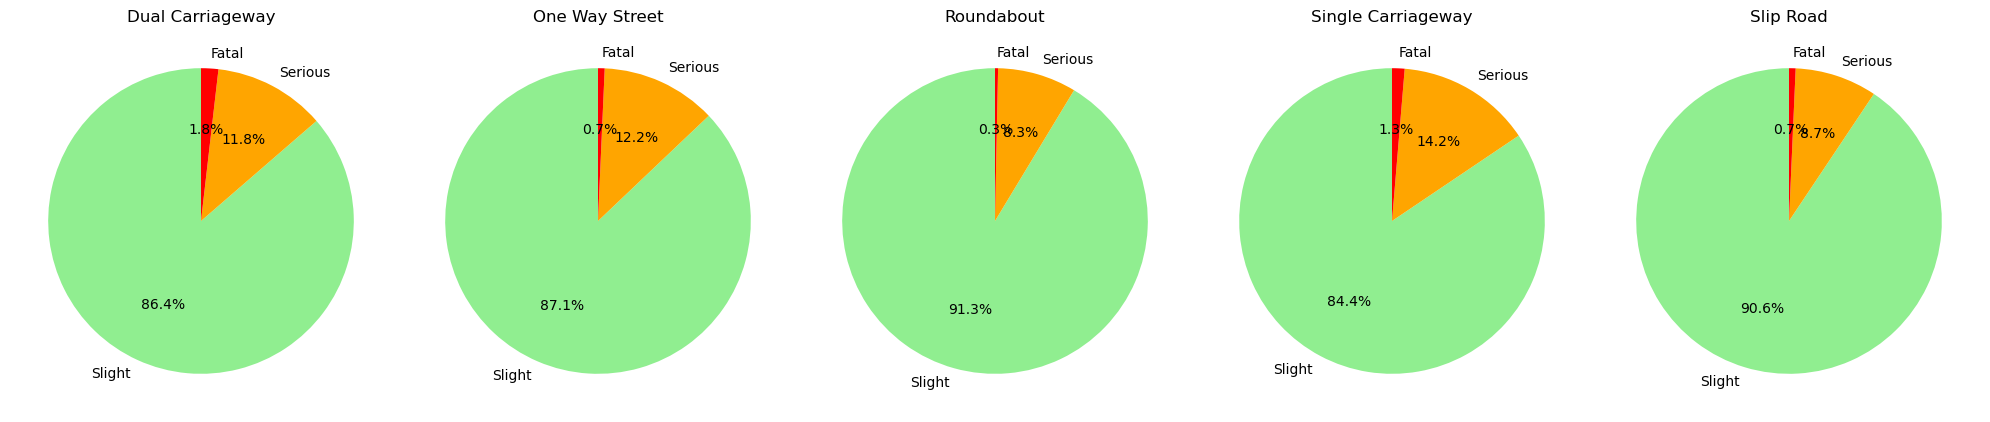

In [114]:

severity_labels = ['Slight', 'Serious', 'Fatal']
dual_carriageway = [85863, 11746, 1815]
one_way_street = [11809, 1655, 95]
roundabout = [40185, 3665, 142]
single_carriageway = [415557, 70059, 6527]
slip_road = [6381, 611, 49]
fig, axs = plt.subplots(1, 5, figsize=(20, 6))
def plot_pie(ax, data, title):
    ax.pie(data, labels=severity_labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange', 'red'])
    ax.set_title(title)
plot_pie(axs[0], dual_carriageway, 'Dual Carriageway')
plot_pie(axs[1], one_way_street, 'One Way Street')
plot_pie(axs[2], roundabout, 'Roundabout')
plot_pie(axs[3], single_carriageway, 'Single Carriageway')
plot_pie(axs[4], slip_road, 'Slip Road')
plt.tight_layout()
plt.show()

<h1>Insight No. 7</h1>
<h1>Which weather and light conditions lead to the highest number of casualties?</h1>
<h1>The highest number of casualties occur during daylight and fine weather without high winds.</h1>

<h1>Correlation of urban/rural classification and accident severity.</h1>

In [42]:
area_severity = accidents.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

In [43]:
area_severity

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               196077
                     Serious               37312
                     Fatal                  5601
Unallocated          Slight                   10
                     Serious                   1
                     Fatal                     0
Urban                Slight               367714
                     Serious               50904
                     Fatal                  3060
Name: count, dtype: int64

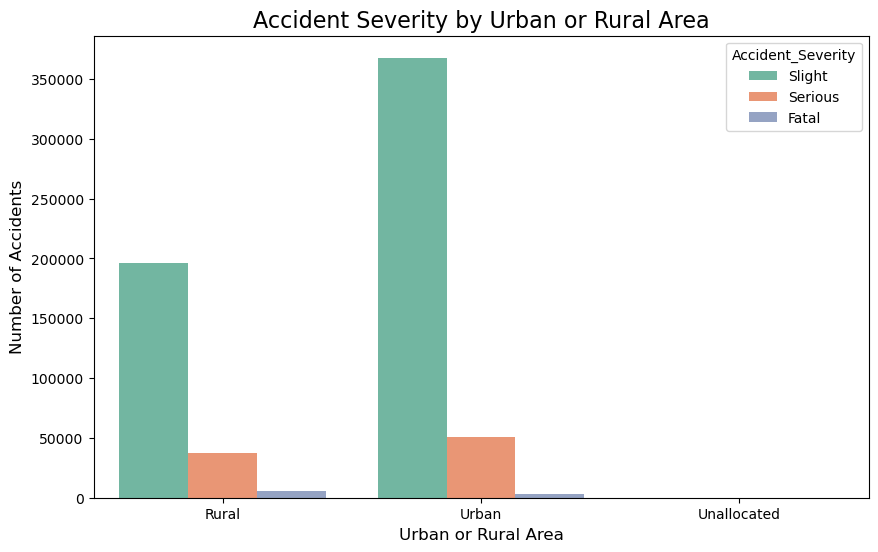

In [115]:

data = {
    'Urban_or_Rural_Area': ['Rural', 'Rural', 'Rural', 'Urban', 'Urban', 'Urban', 'Unallocated', 'Unallocated', 'Unallocated'],
    'Accident_Severity': ['Slight', 'Serious', 'Fatal', 'Slight', 'Serious', 'Fatal', 'Slight', 'Serious', 'Fatal'],
    'Count': [196077, 37312, 5601, 367714, 50904, 3060, 10, 1, 0]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.barplot(x='Urban_or_Rural_Area', y='Count', hue='Accident_Severity', data=df, palette='Set2')
plt.title('Accident Severity by Urban or Rural Area', fontsize=16)
plt.xlabel('Urban or Rural Area', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.show()


<h1>Insight No. 8</h1>
<h1>Urban areas have more accidents but fewer fatalities, with 367,714 minor, 50,904 serious, and 3,060 fatal accidents reported.
Rural areas have fewer accidents, but a higher fatality rate, with 196,077 minor, 37,312 serious, and 5,601 fatal accidents reported.
<1h2>

<h1>Weather conditions affect the number of casualties.</h1>

In [44]:
weather_casualties = np.round(accidents.groupby('Weather_Conditions')['Number_of_Casualties'].mean(), 1)

In [45]:
weather_casualties

Weather_Conditions
Fine + high winds        1.4
Fine no high winds       1.4
Fog or mist              1.5
Other                    1.4
Raining + high winds     1.4
Raining no high winds    1.4
Snowing + high winds     1.4
Snowing no high winds    1.3
Name: Number_of_Casualties, dtype: float64

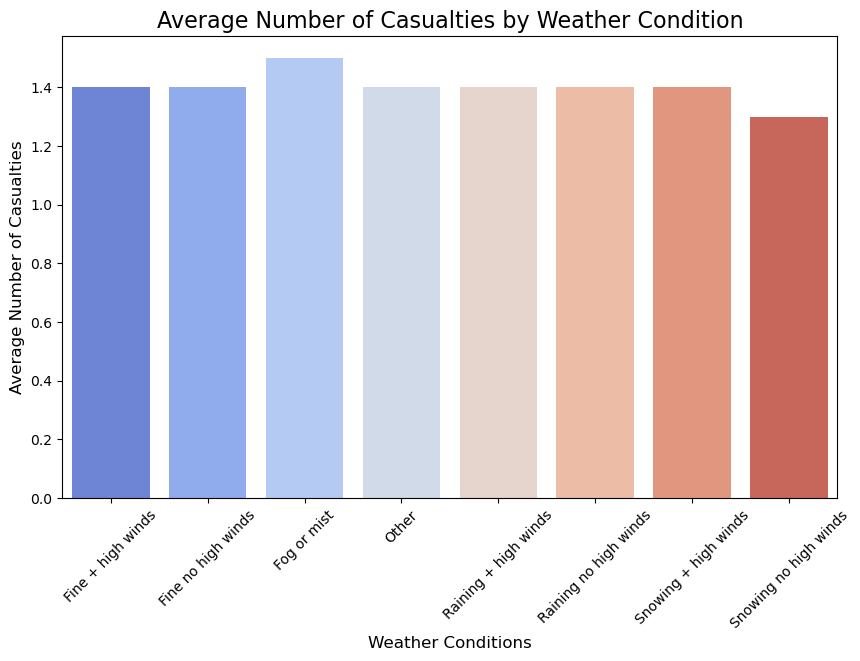

In [116]:
data = {
    'Weather_Conditions': ['Fine + high winds', 'Fine no high winds', 'Fog or mist', 'Other', 
                           'Raining + high winds', 'Raining no high winds', 'Snowing + high winds', 
                           'Snowing no high winds'],
    'Number_of_Casualties': [1.4, 1.4, 1.5, 1.4, 1.4, 1.4, 1.4, 1.3]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_Conditions', y='Number_of_Casualties', data=df, palette='coolwarm')
plt.title('Average Number of Casualties by Weather Condition', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Average Number of Casualties', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<h1>Insight No. 9</h1>
<h1>Foggy or misty weather conditions have the highest casualty rate (1.5).</h1>

<h1>Most common road surface condition for Fatal accidents</h1>

<h1>The most common road surface condition that leads to fatal accidents</h1>
<h1>Fatal Accidents Occur Most on Dry Roads</h1>

In [111]:
severity_rtype = accidents[accidents['Accident_Severity'] == 'Fatal']['Road_Surface_Conditions'].mode()[0]

In [112]:
severity_rtype

'Dry'

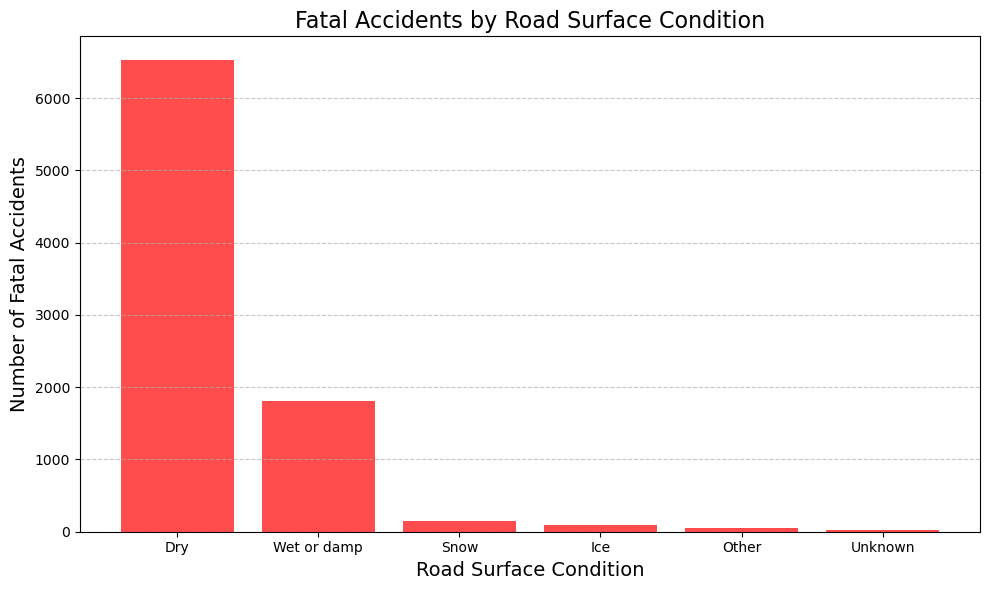

In [113]:
road_surface_conditions = ['Dry', 'Wet or damp', 'Snow', 'Ice', 'Other', 'Unknown']
fatal_accident_counts = [6527, 1815, 142, 95, 49, 30]
plt.figure(figsize=(10, 6))
plt.bar(road_surface_conditions, fatal_accident_counts, color='r', alpha=0.7)
plt.xlabel('Road Surface Condition', fontsize=14)
plt.ylabel('Number of Fatal Accidents', fontsize=14)
plt.title('Fatal Accidents by Road Surface Condition', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>Insight No. 10</h1>
<h1>Relationship between road type and number of vehicles involved</h1>
<h1>Dual carriageways have the highest number of cars per accident, with two.</h1>

In [47]:
severity_rtype

'Dry'

In [48]:
rtype_vehicles = np.round(accidents.groupby('Road_Type')['Number_of_Vehicles'].mean(), 1)

In [49]:
rtype_vehicles

Road_Type
Dual carriageway      2.0
One way street        1.6
Roundabout            1.9
Single carriageway    1.8
Slip road             1.9
Name: Number_of_Vehicles, dtype: float64

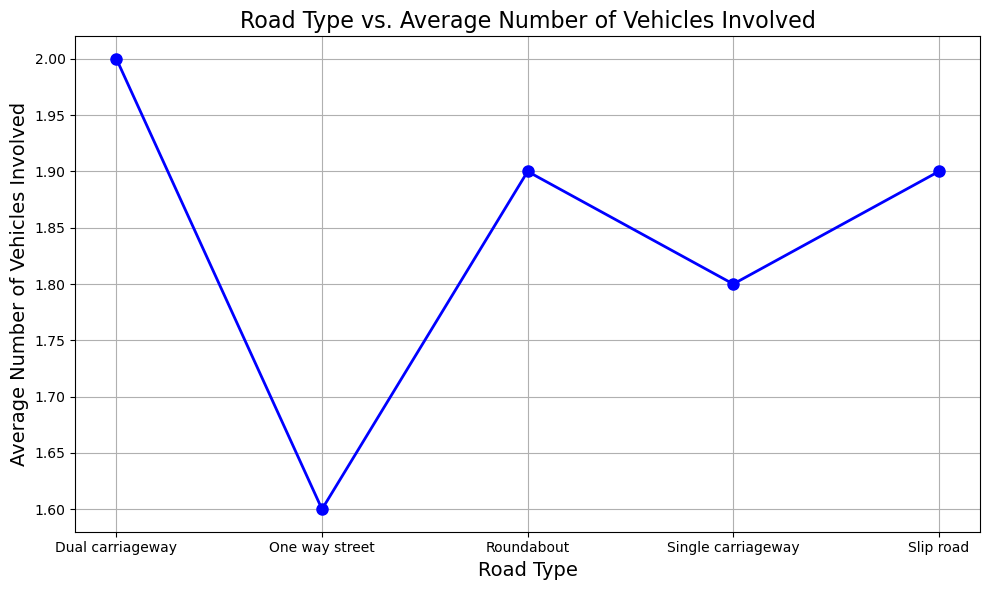

In [110]:
road_types = ['Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road']
vehicles_avg = [2.0, 1.6, 1.9, 1.8, 1.9]
plt.figure(figsize=(10, 6))
plt.plot(road_types, vehicles_avg, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Average Number of Vehicles Involved', fontsize=14)
plt.title('Road Type vs. Average Number of Vehicles Involved', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Insight No. 11</h1>
<h1>Comparison of accident severity under various meteorological conditions.</h1>
<h1>Most accidents happen in "Fine no high winds" circumstances, with 441,739 minor, 72,046 serious, and 7,100 death incidents reported.</h1>

In [50]:
severity_weather = accidents.groupby('Weather_Conditions')['Accident_Severity'].value_counts()

In [51]:
severity_weather

Weather_Conditions     Accident_Severity
Fine + high winds      Slight                 7134
                       Serious                1245
                       Fatal                   175
Fine no high winds     Slight               441739
                       Serious               72046
                       Fatal                  7100
Fog or mist            Slight                 2963
                       Serious                 483
                       Fatal                    82
Other                  Slight                15184
                       Serious                1801
                       Fatal                   165
Raining + high winds   Slight                 8209
                       Serious                1261
                       Fatal                   145
Raining no high winds  Slight                69380
                       Serious                9468
                       Fatal                   848
Snowing + high winds   Slight            

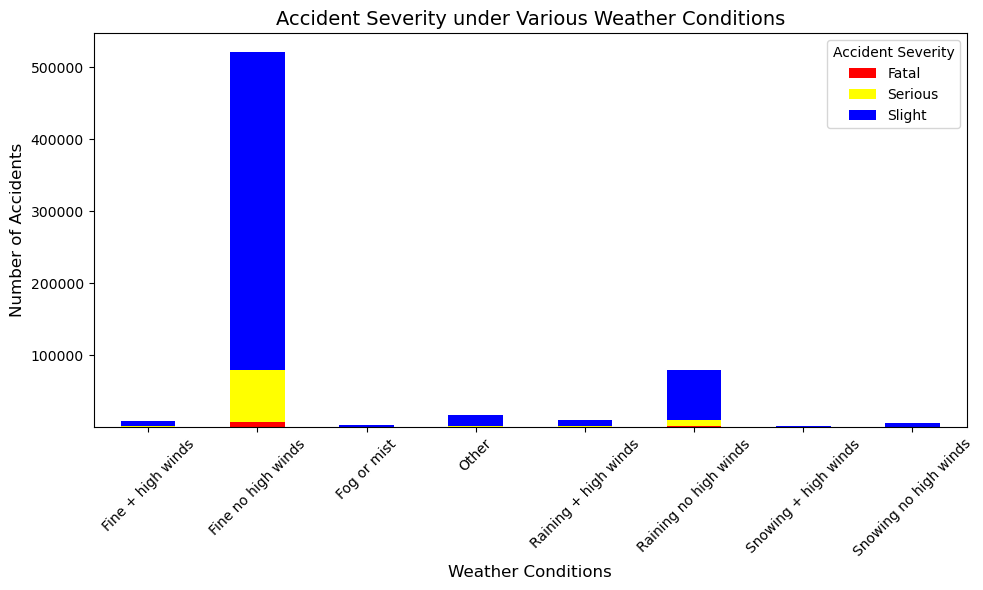

In [107]:
severity_weather_unstacked = severity_weather.unstack()
severity_weather_unstacked.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'yellow', 'blue'])
plt.title('Accident Severity under Various Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()

<h1>Insight No. 12</h1>
<h1>District with the highest number of accidents during the day</h1>

In [52]:
district_daylight = accidents[accidents['Light_Conditions'] == 'Daylight']['District Area'].value_counts()

In [53]:
district_daylight

District Area
Birmingham            9667
Leeds                 6482
Manchester            4610
Bradford              4459
Sheffield             4211
                      ... 
Berwick-upon-Tweed     120
Teesdale               120
Shetland Islands        89
Orkney Islands          74
Clackmannanshire        68
Name: count, Length: 422, dtype: int64

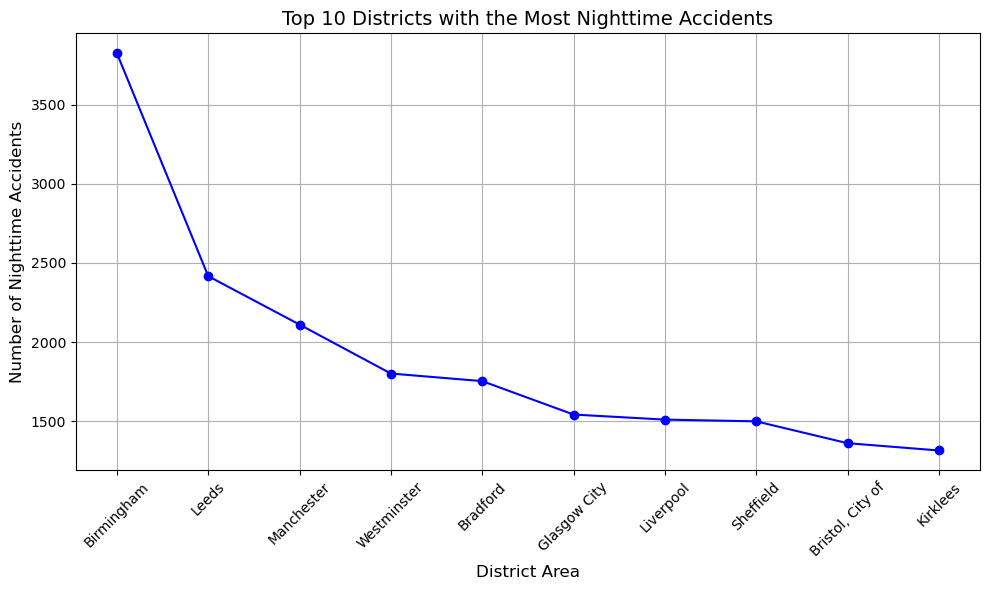

In [104]:
top_districts_nighttime = district_nighttime.head(10)
plt.figure(figsize=(10,6))
plt.plot(top_districts_nighttime.index, top_districts_nighttime.values, marker='o', linestyle='-', color='b')
plt.title('Top 10 Districts with the Most Nighttime Accidents', fontsize=14)
plt.xlabel('District Area', fontsize=12)
plt.ylabel('Number of Nighttime Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Insight No. 13</h1>
<h1>The district with the highest number of accidents at night</h1>
<h1>Birmingham has the most nighttime accidents</h1>

In [54]:
district_nighttime = accidents[accidents['Light_Conditions'] != 'Daylight']['District Area'].value_counts()

In [55]:
district_nighttime

District Area
Birmingham            3824
Leeds                 2416
Manchester            2110
Westminster           1801
Bradford              1753
                      ... 
Orkney Islands          43
Clackmannshire          38
Berwick-upon-Tweed      33
Clackmannanshire        23
Teesdale                22
Name: count, Length: 422, dtype: int64

In [103]:

map_london = folium.Map(location=[51.5074, -0.1278], zoom_start=6)
nighttime_accidents = accidents[accidents['Light_Conditions'] != 'Daylight'].dropna(subset=['Latitude', 'Longitude'])
heat_data = [[row['Latitude'], row['Longitude']] for index, row in nighttime_accidents.iterrows()]
HeatMap(heat_data).add_to(map_london)
map_london.save("nighttime_accidents_heatmap.html")
map_london

<h1>Insight No. 14</h1>
<h1>Clustering of accident-prone areas based on latitude and longitude</h1>
<h1>The highest accident count (45) occurs at latitude 52.949719, longitude -0.977611</h1>

In [56]:
long_lat = accidents[['Latitude', 'Longitude']].value_counts()

In [57]:
long_lat

Latitude   Longitude
52.949719  -0.977611    45
52.458798  -1.871043    35
53.083165  -0.816789    33
52.967634  -1.190861    31
52.938860  -1.216694    29
                        ..
51.608856  -0.698675     1
51.608845  -0.816519     1
51.608842  -3.334621     1
51.608833  -0.182514     1
60.757544  -0.862815     1
Name: count, Length: 570518, dtype: int64

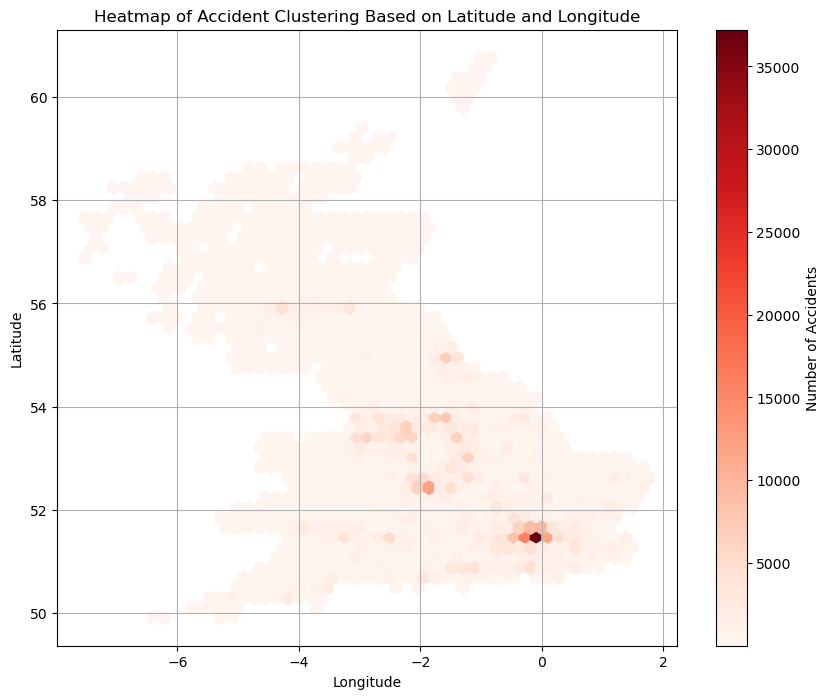

In [58]:
accidents_filtered = accidents[['Latitude', 'Longitude']].dropna()

plt.figure(figsize=(10, 8))
plt.hexbin(accidents_filtered['Longitude'], accidents_filtered['Latitude'], gridsize=50, cmap='Reds', mincnt=1)
plt.colorbar(label='Number of Accidents')
plt.title('Heatmap of Accident Clustering Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

<h1>Insight No. 15</h1>
<h1>Proportion of accidents occurring on weekends</h1>
<h1>The proportion of accidents happening on weekends is 11.84%</h1>

In [59]:
weekends = (accidents['Accident Date'].dt.dayofweek >= 5).mean() * 100

In [60]:
weekends

11.840697222100294

C:\Users\Ramon\AppData\Local\Temp\ipykernel_19832\925527636.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(accidents['Weekday_Weekend'], bins=2, palette='coolwarm', kde=False)


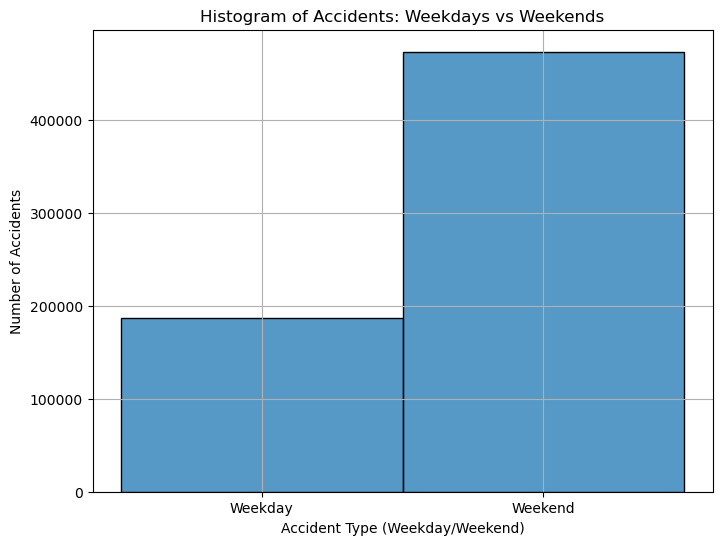

In [61]:
accidents['Weekday_Weekend'] = accidents['Accident Date'].dt.dayofweek < 5
accidents['Weekday_Weekend'] = accidents['Weekday_Weekend'].map({True: 'Weekday', False: 'Weekend'})
plt.figure(figsize=(8, 6))
sns.histplot(accidents['Weekday_Weekend'], bins=2, palette='coolwarm', kde=False)
plt.title('Histogram of Accidents: Weekdays vs Weekends')
plt.xlabel('Accident Type (Weekday/Weekend)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

<h1>Insight No. 16</h1>
<h1>Proportion of accidents occurring on weekdays</h1>
<h1>The proportion of accidents happening on weekdays is 28.27%</h1>

In [62]:
weekdays = (accidents['Accident Date'].dt.dayofweek < 5).mean() * 100

In [63]:
weekdays

28.27061250622466

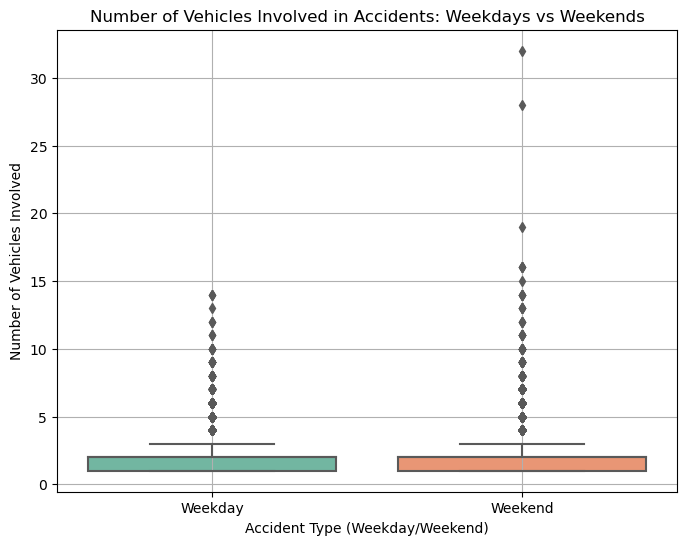

In [64]:
accidents['Weekday_Weekend'] = accidents['Accident Date'].dt.dayofweek < 5
accidents['Weekday_Weekend'] = accidents['Weekday_Weekend'].map({True: 'Weekday', False: 'Weekend'})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Weekday_Weekend', y='Number_of_Vehicles', data=accidents, palette='Set2')
plt.title('Number of Vehicles Involved in Accidents: Weekdays vs Weekends')
plt.xlabel('Accident Type (Weekday/Weekend)')
plt.ylabel('Number of Vehicles Involved')
plt.grid(True)
plt.show()

<h1>Insight No. 17</h1>
<h1>Road type with the highest number of fatal accidents</h1>
<h1>Single carriageways have the highest number of fatal accidents, with 6,527 fatalities</h1>

In [65]:
rtype_fatal = accidents[accidents['Accident_Severity'] == 'Fatal']['Road_Type'].value_counts()

In [66]:
rtype_fatal

Road_Type
Single carriageway    6527
Dual carriageway      1815
Roundabout             142
One way street          95
Slip road               49
Name: count, dtype: int64

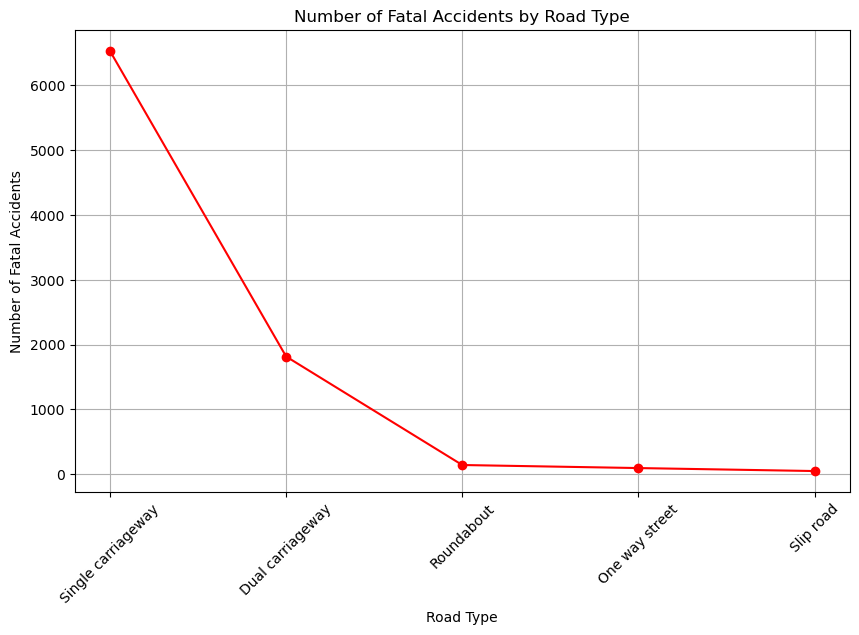

In [67]:
rtype_fatal_sorted = rtype_fatal.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(rtype_fatal_sorted.index, rtype_fatal_sorted.values, marker='o', linestyle='-', color='red')
plt.title('Number of Fatal Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h1>Insight No. 18</h1>
<h1>Most common day of the week for accidents</h1>
<h1>Saturday has the highest number of accidents (43,164), followed by Wednesday (40,037) and Friday (39,822)</h1>

In [68]:
accident_day = accidents['Accident Date'].dt.day_name().value_counts()

In [69]:
accident_day

Accident Date
Saturday     43164
Wednesday    40037
Friday       39822
Thursday     39641
Tuesday      38714
Sunday       35065
Monday       28564
Name: count, dtype: int64

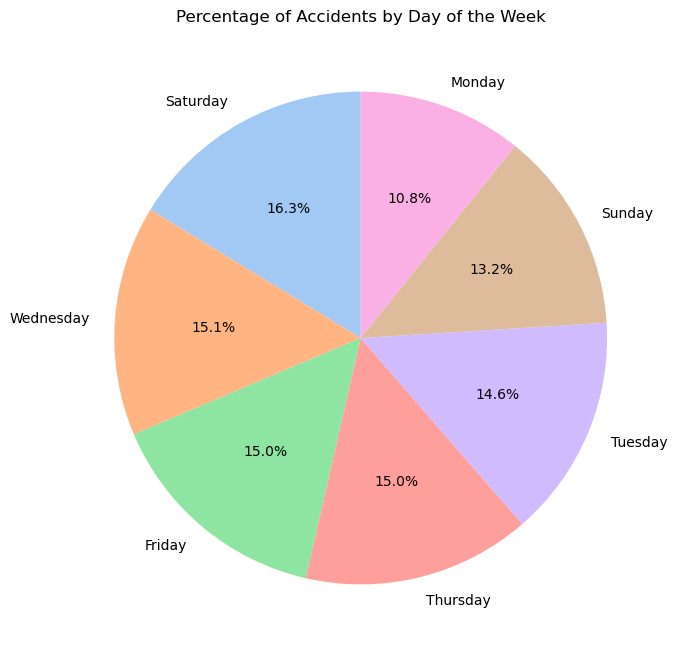

In [70]:
accident_day.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=sns.color_palette('pastel'))
plt.title('Percentage of Accidents by Day of the Week')
plt.ylabel('')
plt.show()

<h1>Insight No. 19</h1>
<h1>Average number of vehicles involved in accidents on dry vs. wet roads</h1>
<h1>The average number of vehicles involved in accidents is the same (1.8) for both dry and wet or damp roads</h1>

In [71]:
vehicles_roadcon = np.round(accidents.groupby('Road_Surface_Conditions')['Number_of_Vehicles'].mean(), 1)

In [72]:
vehicles_roadcon

Road_Surface_Conditions
Dry                     1.8
Flood over 3cm. deep    1.6
Frost or ice            1.6
Snow                    1.7
Wet or damp             1.8
Name: Number_of_Vehicles, dtype: float64

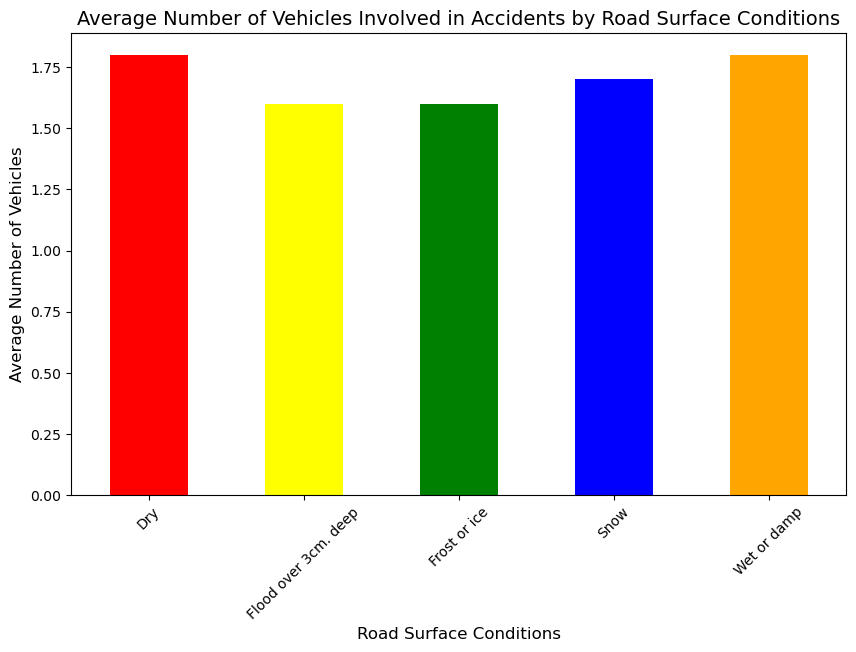

In [73]:

plt.figure(figsize=(10, 6))
vehicles_roadcon.plot(kind='bar', color=['red', 'yellow', 'green', 'blue', 'orange'])

plt.title('Average Number of Vehicles Involved in Accidents by Road Surface Conditions', fontsize=14)
plt.xlabel('Road Surface Conditions', fontsize=12)
plt.ylabel('Average Number of Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<h1>Insight No. 20</h1>
<h1>Maximum number of casualties in a single-vehicle accident.</h1>

In [74]:
casualties_single = accidents[accidents['Number_of_Vehicles'] == 1]['Number_of_Casualties'].max()

In [75]:
casualties_single

68

In [76]:
accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Weekday_Weekend                    object
dtype: object

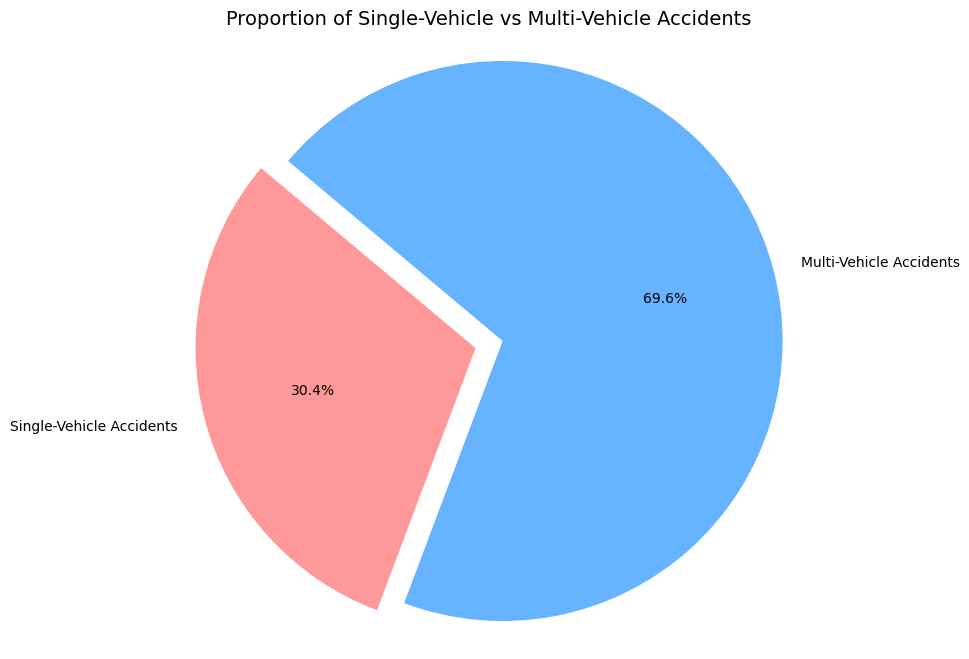

In [77]:

single_vehicle_accidents = len(accidents[accidents['Number_of_Vehicles'] == 1])
multi_vehicle_accidents = len(accidents[accidents['Number_of_Vehicles'] > 1])
labels = ['Single-Vehicle Accidents', 'Multi-Vehicle Accidents']
sizes = [single_vehicle_accidents, multi_vehicle_accidents]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Proportion of Single-Vehicle vs Multi-Vehicle Accidents', fontsize=14)
plt.show()


<h1>Insight No. 21</h1>
<h1>A single-vehicle collision can result in up to car victims.</h1>
<h1>Which vehicle type has the most accidents?</h1>
<h1>Cars have the highest number of accidents.</h1>

In [78]:
vehicletype_accidents = accidents['Vehicle_Type'].value_counts()

In [79]:
vehicletype_accidents

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

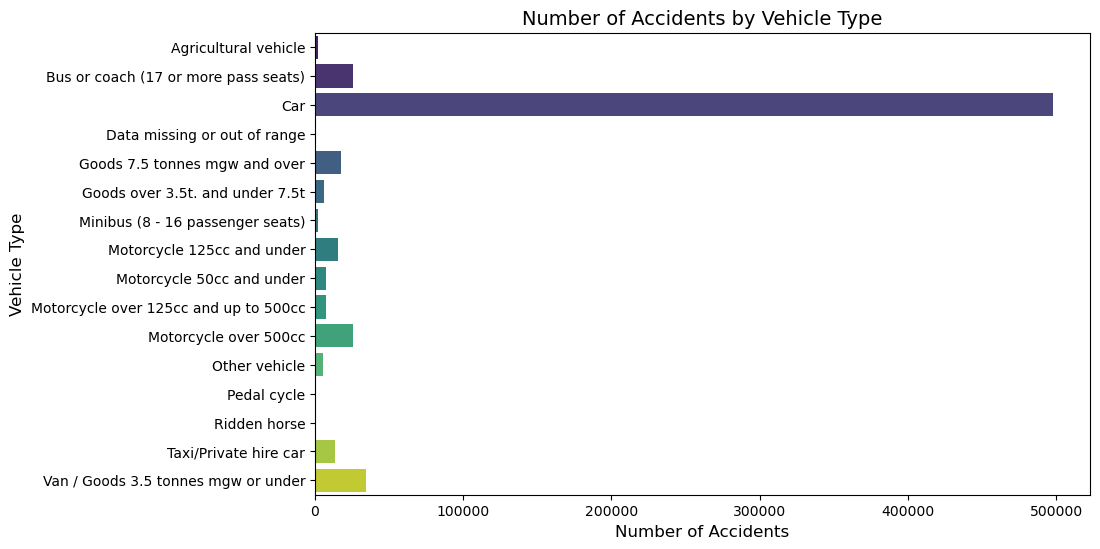

In [80]:
vehicletype_accidents = accidents['Vehicle_Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=vehicletype_accidents.values, y=vehicletype_accidents.index, palette='viridis')
plt.title('Number of Accidents by Vehicle Type', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Vehicle Type', fontsize=12)
plt.show()

<h1>Insight No. 22</h1>
<h1>In which area has the has the higher number of casualties?</h1>
<h1>Urban area has a higher number of casualties</h1>

In [81]:
area_casualties = accidents.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].sum()

In [82]:
area_casualties

Urban_or_Rural_Area
Rural          353515
Unallocated        13
Urban          543040
Name: Number_of_Casualties, dtype: int64

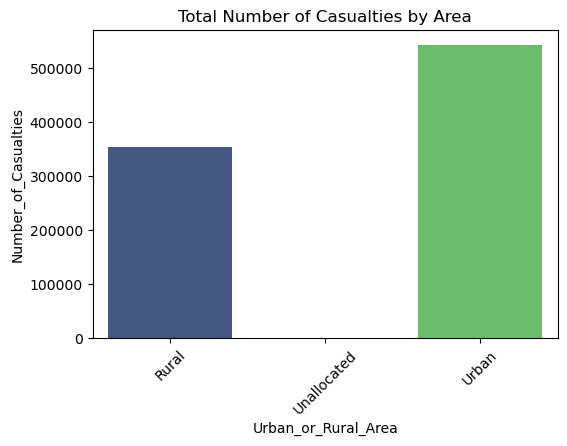

In [83]:
area_casualties = accidents.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].sum()
plt.figure(figsize=(6,4))
sns.barplot(x=area_casualties.index, y=area_casualties.values, palette='viridis')
plt.title('Total Number of Casualties by Area')
plt.xlabel('Urban_or_Rural_Area')
plt.ylabel('Number_of_Casualties')
plt.xticks(rotation=45)

plt.show()


<h1>Insight No. 23</h1>
<h1>What is the average number of vehicles in an accident?</h1>
<h1>The average number of vehicles in an accident is 1.8 </h1>

In [84]:
avg_vehicles = np.round(accidents['Number_of_Vehicles'].mean(), 1)

In [85]:
avg_vehicles

1.8

In [86]:
avg_vehicles_by_road_type = accidents.groupby('Road_Type')['Number_of_Vehicles'].mean().round(1)
print(avg_vehicles_by_road_type)


Road_Type
Dual carriageway      2.0
One way street        1.6
Roundabout            1.9
Single carriageway    1.8
Slip road             1.9
Name: Number_of_Vehicles, dtype: float64


In [87]:
avg_vehicles_by_area = accidents.groupby('Urban_or_Rural_Area')['Number_of_Vehicles'].mean().round(1)
print(avg_vehicles_by_area)


Urban_or_Rural_Area
Rural          1.9
Unallocated    1.9
Urban          1.8
Name: Number_of_Vehicles, dtype: float64


In [88]:
avg_vehicles_by_severity = accidents.groupby('Accident_Severity')['Number_of_Vehicles'].mean().round(1)
print(avg_vehicles_by_severity)


Accident_Severity
Fatal      1.8
Serious    1.7
Slight     1.9
Name: Number_of_Vehicles, dtype: float64


In [89]:

avg_vehicles_by_road_type = accidents.groupby('Road_Type')['Number_of_Vehicles'].mean().round(1)
print("Average Number of Vehicles by Road Type:")
print(avg_vehicles_by_road_type)


Average Number of Vehicles by Road Type:
Road_Type
Dual carriageway      2.0
One way street        1.6
Roundabout            1.9
Single carriageway    1.8
Slip road             1.9
Name: Number_of_Vehicles, dtype: float64


In [90]:

avg_vehicles_by_area = accidents.groupby('Urban_or_Rural_Area')['Number_of_Vehicles'].mean().round(1)
print("\nAverage Number of Vehicles by Urban or Rural Area:")
print(avg_vehicles_by_area)



Average Number of Vehicles by Urban or Rural Area:
Urban_or_Rural_Area
Rural          1.9
Unallocated    1.9
Urban          1.8
Name: Number_of_Vehicles, dtype: float64


In [91]:

avg_vehicles_by_severity = accidents.groupby('Accident_Severity')['Number_of_Vehicles'].mean().round(1)
print("\nAverage Number of Vehicles by Accident Severity:")
print(avg_vehicles_by_severity)



Average Number of Vehicles by Accident Severity:
Accident_Severity
Fatal      1.8
Serious    1.7
Slight     1.9
Name: Number_of_Vehicles, dtype: float64


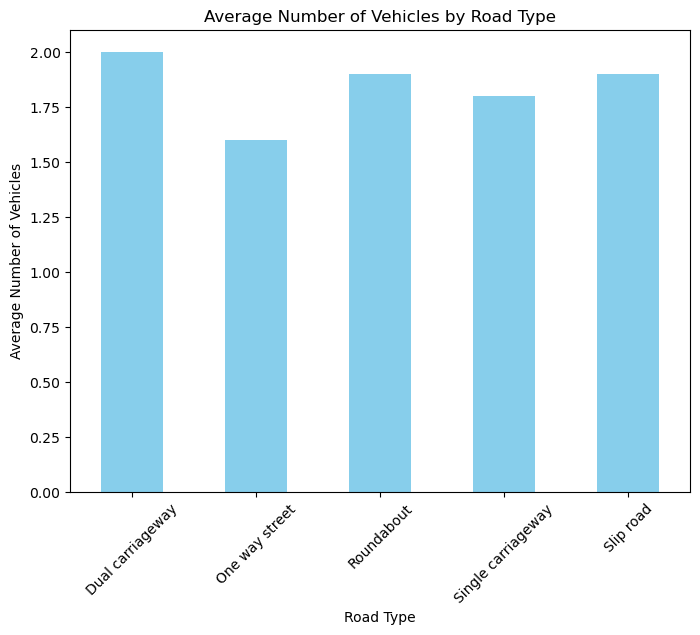

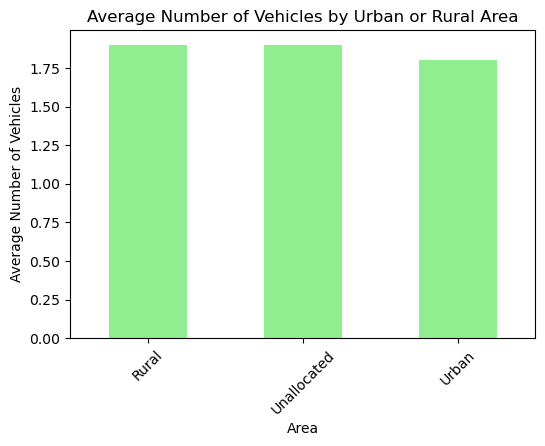

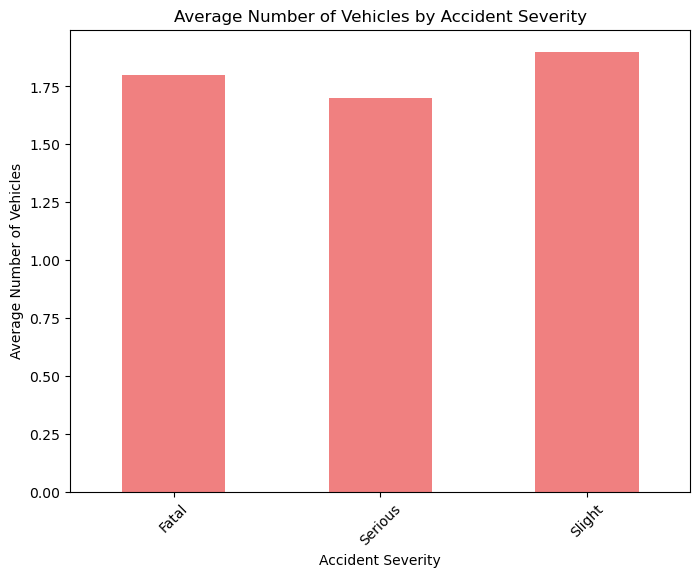

In [92]:
plt.figure(figsize=(8, 6))
avg_vehicles_by_road_type.plot(kind='bar', color='skyblue')
plt.title('Average Number of Vehicles by Road Type')
plt.ylabel('Average Number of Vehicles')
plt.xlabel('Road Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
avg_vehicles_by_area.plot(kind='bar', color='lightgreen')
plt.title('Average Number of Vehicles by Urban or Rural Area')
plt.ylabel('Average Number of Vehicles')
plt.xlabel('Area')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
avg_vehicles_by_severity.plot(kind='bar', color='lightcoral')
plt.title('Average Number of Vehicles by Accident Severity')
plt.ylabel('Average Number of Vehicles')
plt.xlabel('Accident Severity')
plt.xticks(rotation=45)
plt.show()

<h1>Insight No. 24</h1>
<h1>In which road area has the higher number of accidents?</h1>
<h1>Urban roads have a higher accidents than roads in rural areas.</h1>

In [93]:
accidents_per_area_road = accidents.groupby(['Urban_or_Rural_Area', 'Road_Type']).size().unstack().T

In [94]:
accidents_per_area_road

Urban_or_Rural_Area   Rural  Unallocated   Urban
Road_Type                                       
Dual carriageway      48715            1   50708
One way street         1193            0   12366
Roundabout            15545            1   28446
Single carriageway   168010            9  324124
Slip road              4294            0    2747

<Figure size 1000x600 with 0 Axes>

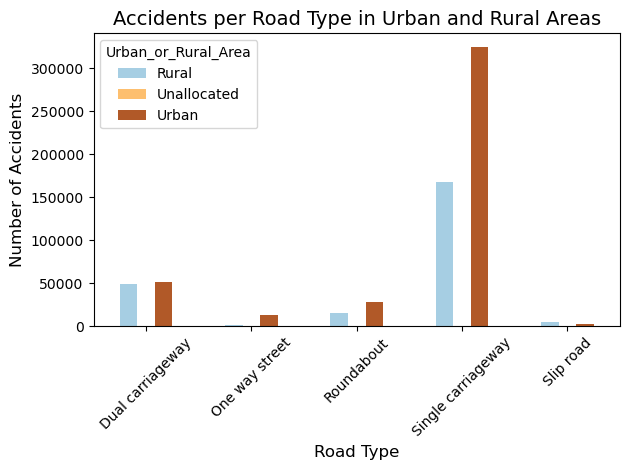

In [95]:

accidents_per_area_road = accidents.groupby(['Urban_or_Rural_Area', 'Road_Type']).size().unstack().T
plt.figure(figsize=(10, 6))
accidents_per_area_road.plot(kind='bar', stacked=False, colormap='Paired')
plt.title('Accidents per Road Type in Urban and Rural Areas', fontsize=14)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>Insight No.25</h1>
<h1>Which day of the week has the highest number of accidents?</h1>

In [96]:
day_of_week_accidents = accidents.groupby("Index").size()

In [97]:
day_of_week_accidents.idxmax()

'2.01E+12'

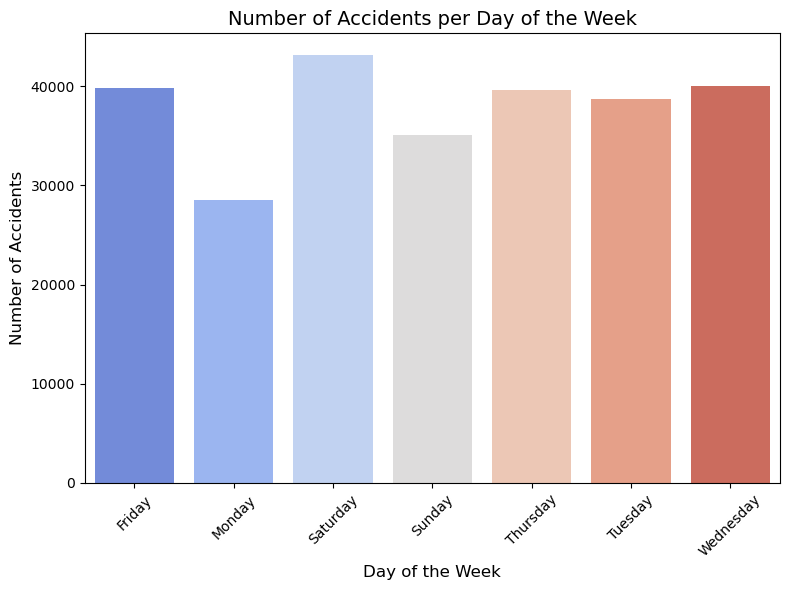

The day with the highest number of accidents is: Saturday


In [98]:

accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'])
accidents['Day_of_Week'] = accidents['Accident Date'].dt.dayofweek
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
accidents['Day_of_Week'] = accidents['Day_of_Week'].map(days_mapping)
day_of_week_accidents = accidents.groupby('Day_of_Week').size()
max_day = day_of_week_accidents.idxmax()
plt.figure(figsize=(8, 6))
sns.barplot(x=day_of_week_accidents.index, y=day_of_week_accidents.values, palette='coolwarm')
plt.title('Number of Accidents per Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"The day with the highest number of accidents is: {max_day}")


<H1>BARCHART</H1>

In [99]:
accident_per_date = accidents['Light_Conditions'].value_counts().sort_index()

In [100]:
accidents_per_severeinity = accidents['Urban_or_Rural_Area'].value_counts().sort_index()

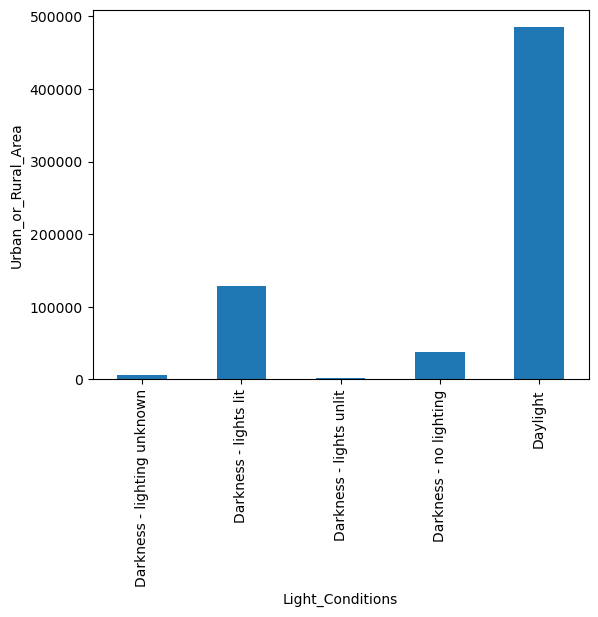

In [101]:
accident_per_date.plot(kind='bar')
plt.title('')
plt.xlabel('Light_Conditions')
plt.ylabel('Urban_or_Rural_Area')
plt.show()

Text(0.5, 1.0, '')

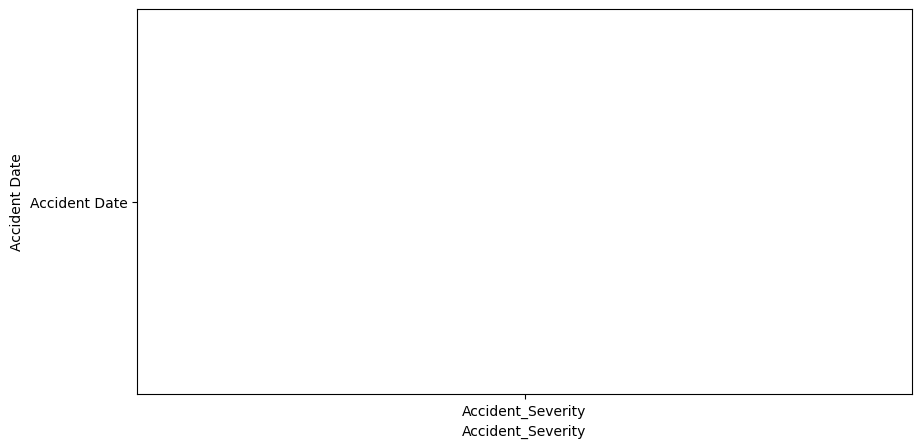

In [102]:
plt.figure(figsize=(10,5))
plt.bar(['Accident_Severity'][:10],['Accident Date'][:10], color='cyan')
plt.xlabel('Accident_Severity')
plt.ylabel('Accident Date')
plt.title('')